In [4]:
import pandas as pd

Cafe = pd.read_csv("Cafe.csv")

print(Cafe.head())

   transaction_id transaction_date transaction_time  store_id store_location  \
0          114301         01/06/23      11:33:29 AM         3        Astoria   
1          115405         02/06/23      11:18:24 AM         3        Astoria   
2          115478         02/06/23      12:02:45 PM         3        Astoria   
3          116288         02/06/23       7:39:47 PM         3        Astoria   
4          116714         03/06/23      12:24:57 PM         3        Astoria   

   product_id  transaction_qty  unit_price  Total_Bill product_category  \
0          45                1           3           3              Tea   
1          45                1           3           3              Tea   
2          45                1           3           3              Tea   
3          45                1           3           3              Tea   
4          45                1           3           3              Tea   

        product_type product_detail   Size Month Name  
0  Brewed he

In [9]:
Cafe['transaction_date']= pd.to_datetime(Cafe['transaction_date'], format='%Y-%m-%d')

In [12]:
print(Cafe.isnull().sum())

transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
Total_Bill          0
product_category    0
product_type        0
product_detail      0
Size                0
Month Name          0
dtype: int64


In [13]:
print(Cafe.describe())

       transaction_id               transaction_date       store_id  \
count   149116.000000                         149116  149116.000000   
mean     74737.371872  2023-05-15 09:14:12.608707328       5.342063   
min          1.000000            2023-01-01 00:00:00       3.000000   
25%      37335.750000            2023-03-16 00:00:00       3.000000   
50%      74727.500000            2023-05-14 00:00:00       5.000000   
75%     112094.250000            2023-06-24 00:00:00       8.000000   
max     149456.000000            2023-12-06 00:00:00       8.000000   
std      43153.600016                            NaN       2.074241   

          product_id  transaction_qty     unit_price     Total_Bill  
count  149116.000000    149116.000000  149116.000000  149116.000000  
mean       47.918607         1.438276       3.337730       4.684246  
min         1.000000         1.000000       1.000000       1.000000  
25%        33.000000         1.000000       2.000000       3.000000  
50%       

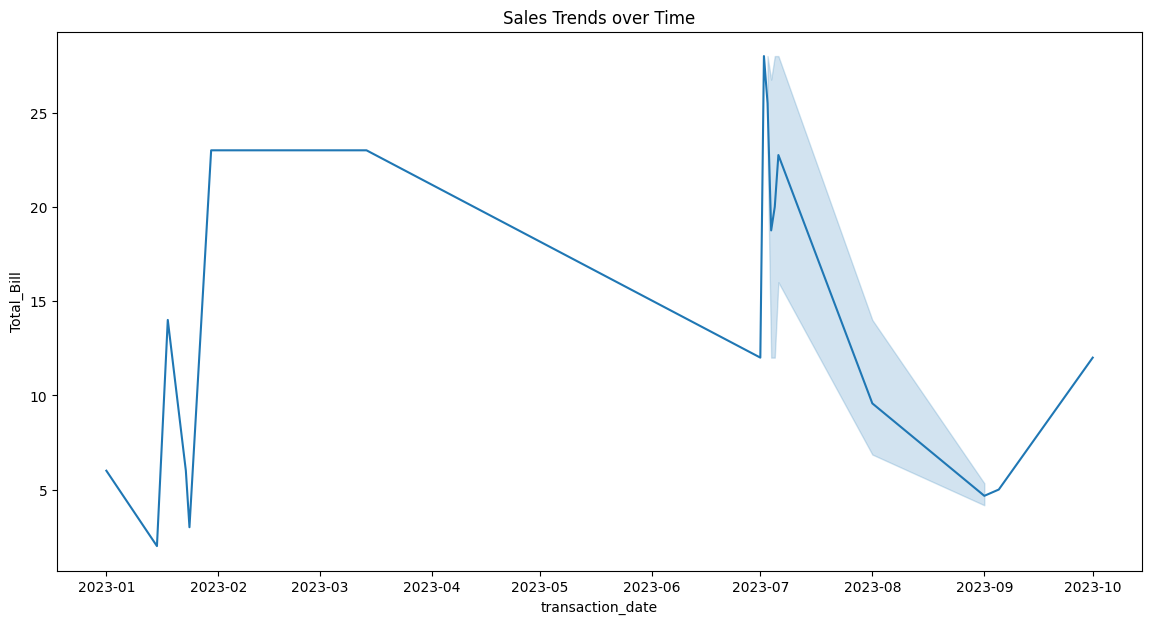

<Figure size 1400x700 with 0 Axes>

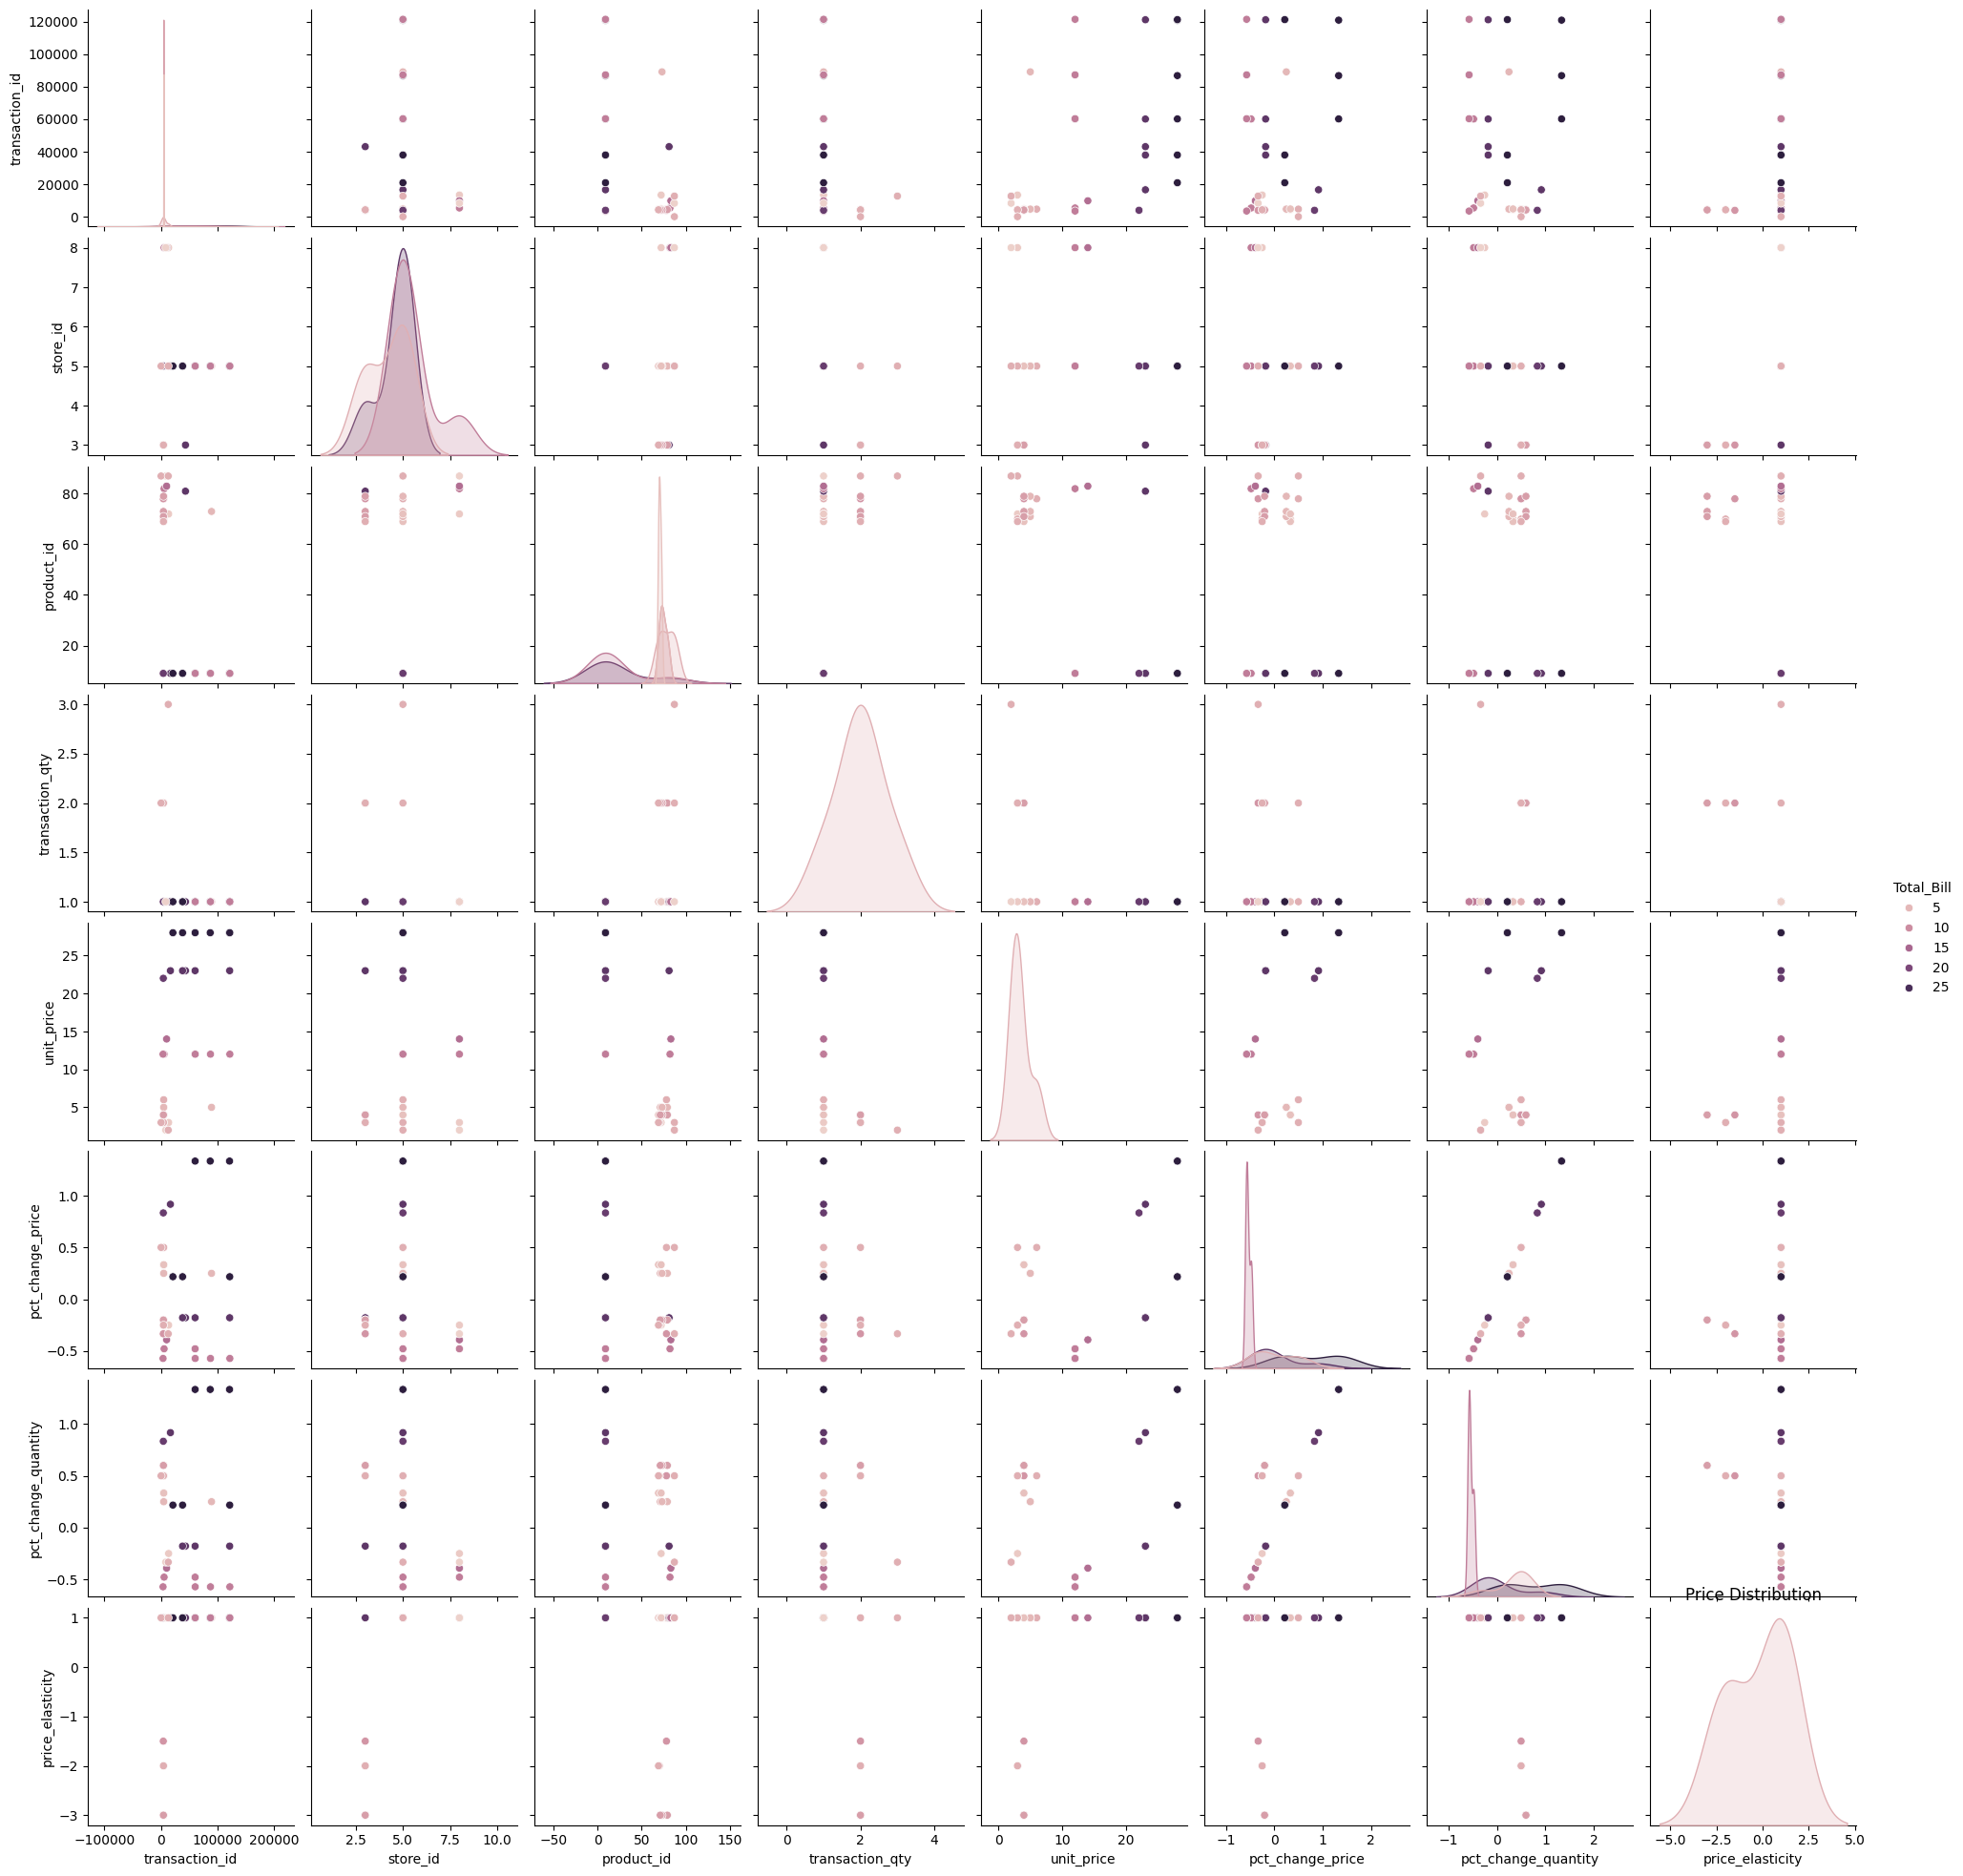

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 7))
sns.lineplot(data= Cafe, x='transaction_date', y='Total_Bill')
plt.title('Sales Trends over Time')
plt.show()

plt.figure(figsize=(14, 7))
# sns.histplot(Cafe['Total_Bill'], bins=20)
# plt.title('Price Distribution')
# plt.show()

sns.pairplot(data= Cafe, hue="Total_Bill")
plt.title('Price Distribution')
plt.show()

In [16]:
Cafe['pct_change_price'] = Cafe.groupby('product_id')['unit_price'].pct_change()
Cafe['pct_change_quantity'] = Cafe.groupby('product_id')['Total_Bill'].pct_change()

        product_id  price_elasticity
66204           70               1.0
66205           69               1.0
66210           78               1.0
66211           79               1.0
66212           71               1.0
66296           73               1.0
66360           72               1.0
67693           81               1.0
67703           82               1.0
67925           83               1.0
68667            9               1.0
78275           87               1.0
114488          78              -1.5
114490          70              -2.0
114492          79              -3.0
114564          73              -3.0
114565          71              -3.0
114566          69              -2.0


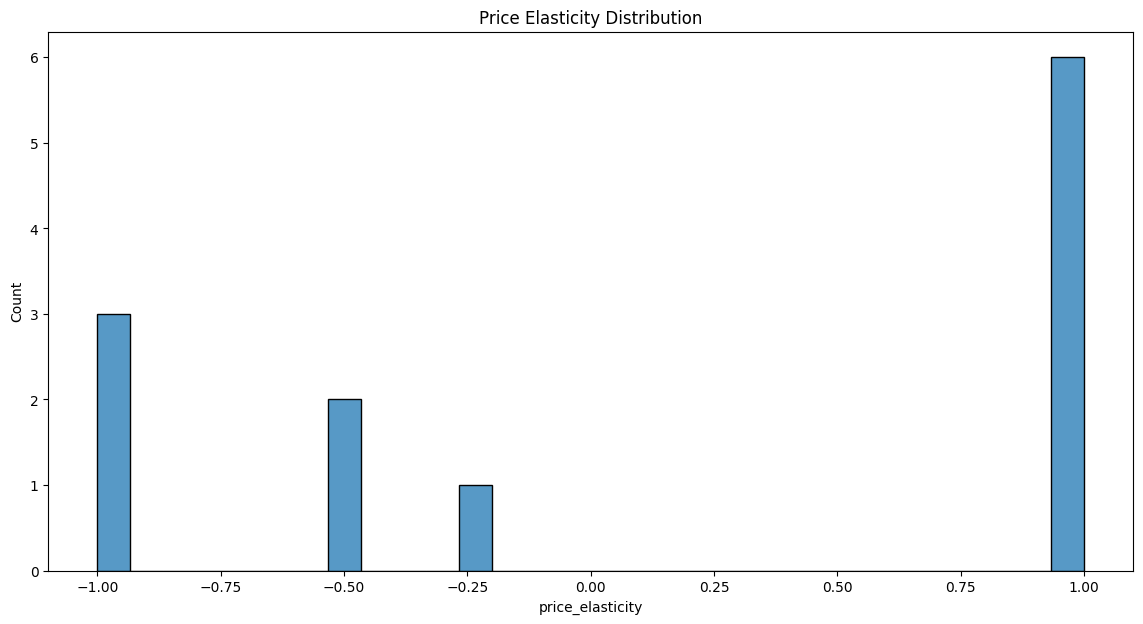

In [27]:
#price elasticity of demand

Cafe['price_elasticity'] = Cafe['pct_change_quantity']/ Cafe['pct_change_price']

#drop rows having NAN or 0 values
Cafe = Cafe.replace([np.inf,-np.inf], np.nan).dropna(subset=['price_elasticity'])

print(Cafe[['product_id','price_elasticity']].drop_duplicates())

plt.figure(figsize=(14, 7))
sns.histplot(data=product_elasticity, x='price_elasticity', bins=30)
plt.title('Price Elasticity Distribution')
plt.show()


In [21]:
# AVG

product_elasticity = Cafe.groupby('product_id')['price_elasticity'].mean().reset_index()

#function to calculate optimal price

def optimal_price(current_price, elasticity):
    return current_price* (1+ (1/elasticity))

product_elasticity['optimal_price']= product_elasticity.apply(
    lambda row: optimal_price(
          Cafe.loc[Cafe['product_id'] == row['product_id'], 'Total_Bill'].mean(),
          row['price_elasticity']
    ), axis=1)

# optimal price
print(product_elasticity[['product_id','optimal_price']])

    product_id  optimal_price
0            9   4.275000e+01
1           69  -5.000000e+00
2           70  -5.000000e+00
3           71   4.329870e-15
4           72   7.000000e+00
5           73   4.329870e-15
6           78  -2.250000e+01
7           79   4.329870e-15
8           81   4.600000e+01
9           82   2.400000e+01
10          83   2.800000e+01
11          87   9.333333e+00


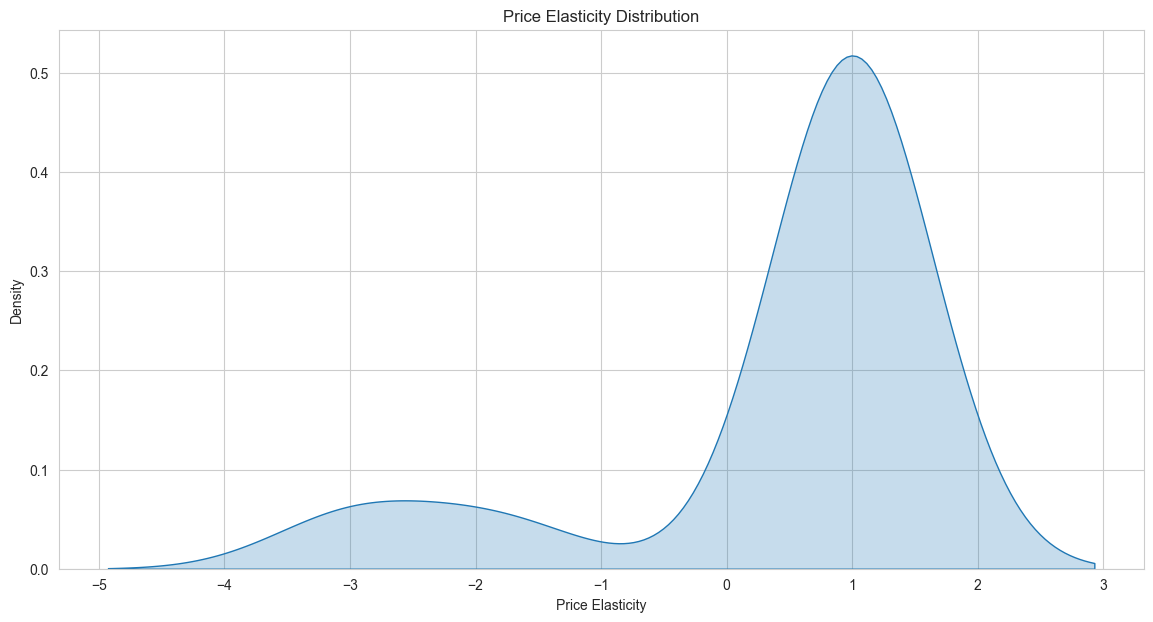

In [52]:
plt.figure(figsize=(14, 7))
sns.kdeplot(data=Cafe, x='price_elasticity', fill=True)
plt.title('Price Elasticity Distribution')
plt.xlabel('Price Elasticity')
plt.ylabel('Density')
plt.show()

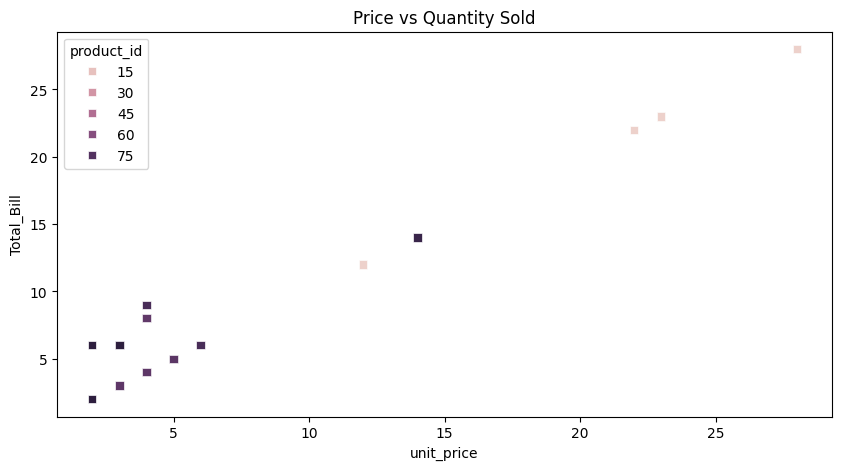

In [39]:
plt.figure(figsize=(10, 5))
# color= sns.color_palette("Viridis")
sns.scatterplot(data=Cafe, x='unit_price', y='Total_Bill', hue='product_id', marker='s')
plt.title('Price vs Quantity Sold')
plt.show()

       transaction_id  store_id  product_id  transaction_qty  unit_price  \
66204            4477         5          70                1           4   
66205            4487         5          69                1           4   
66210            4653         5          78                1           6   
66211            4664         5          79                1           5   
66212            4669         5          71                1           5   

       Total_Bill  pct_change_price  pct_change_quantity  price_elasticity  
66204           4          0.333333             0.333333               1.0  
66205           4          0.333333             0.333333               1.0  
66210           6          0.500000             0.500000               1.0  
66211           5          0.250000             0.250000               1.0  
66212           5          0.250000             0.250000               1.0  


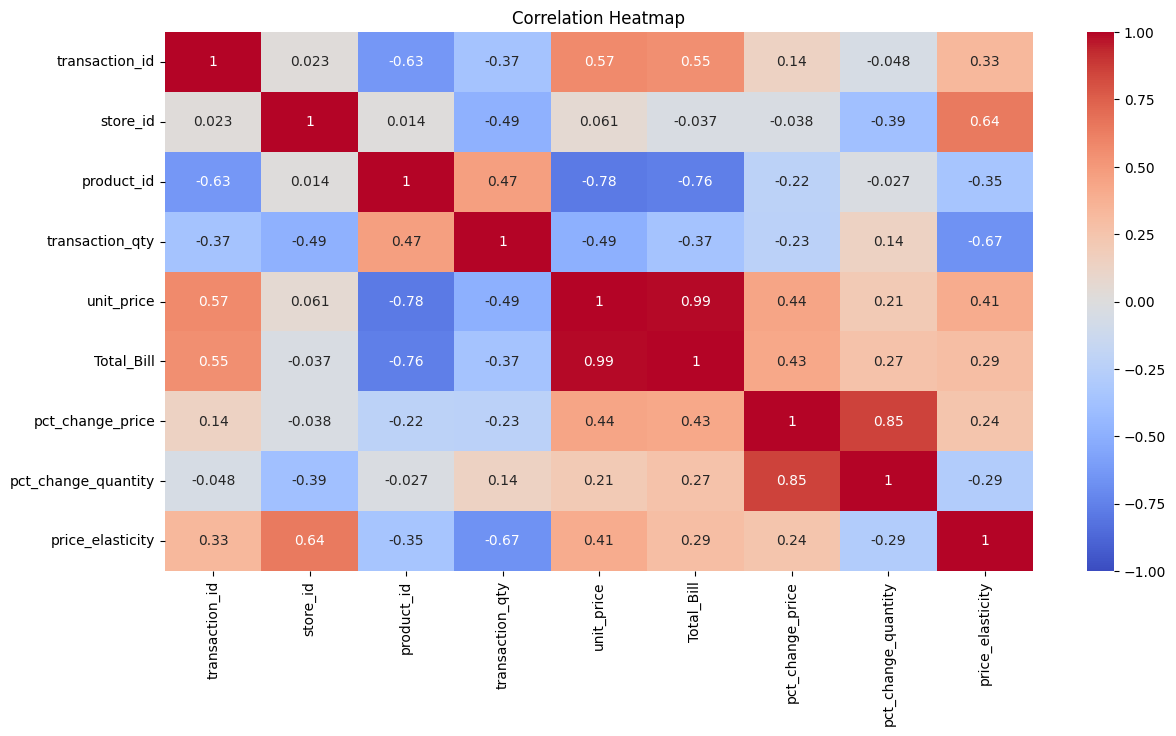

In [25]:
numeric_Cafe = Cafe.select_dtypes(include=[np.number])

print(numeric_Cafe.head())

plt.figure(figsize=(14, 7))
sns.heatmap(numeric_Cafe.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

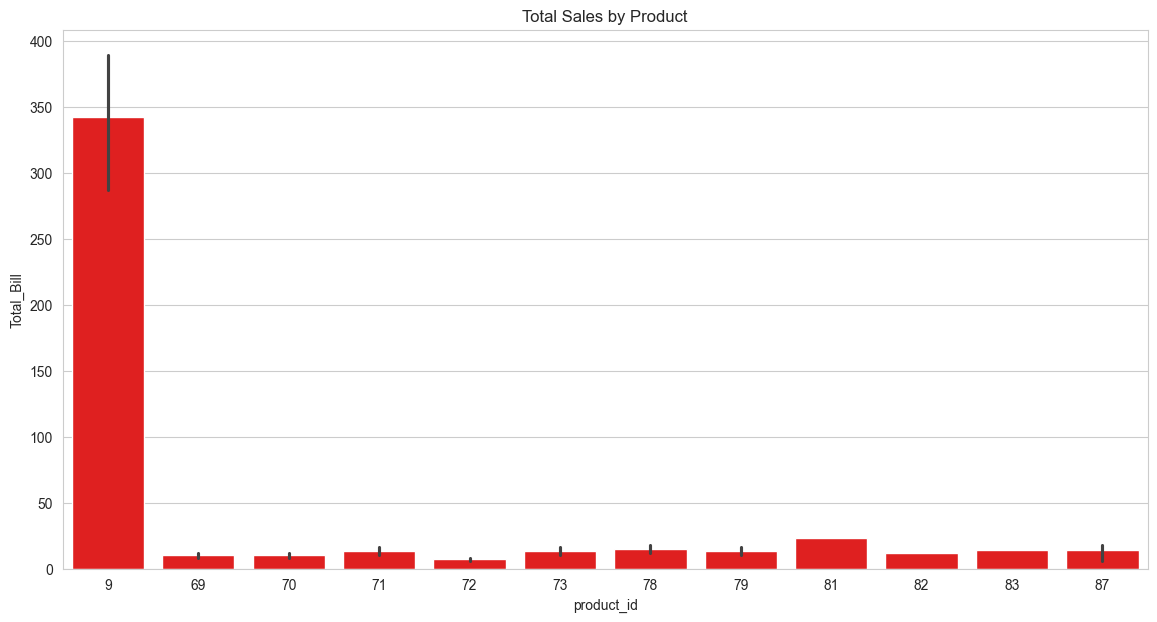

In [49]:
plt.figure(figsize=(14, 7))
sns.set_style(style = "whitegrid")
sns.barplot(data=Cafe, x='product_id', y='Total_Bill', estimator=sum, color='red')
plt.title('Total Sales by Product')
plt.show()
